In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

#  Read in the DATA

df = pd.read_csv(r'C:\Users\nickm\Desktop\Portfolio\Python_port\movies.csv')








In [28]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [20]:
# Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


name           category
rating             int8
genre              int8
year              int64
released          int16
score           float64
votes           float64
director          int16
writer            int16
star              int16
country            int8
budget          float64
gross           float64
company           int16
runtime         float64
yearcorrect       int16
dtype: object

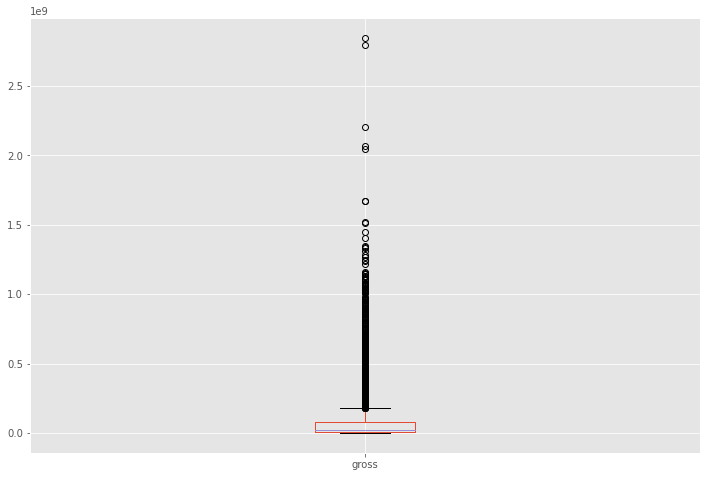

In [122]:
# Looking at my data types in the columns

# Are there any Outliers?

df.boxplot(column=['gross'])

df.dtypes

In [123]:
# No outliers so lets open this up to look at everything

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [87]:
pd.set_option('display.max_rows', None)

In [139]:
# Dropping duplicates

df['company'].drop_duplicates().sort_values(ascending=False).head()

7129    2384
5664    2383
6412    2382
4007    2381
6793    2380
Name: company, dtype: int16

In [91]:
# Going to compare and contrast budget with gross, I think the higher the budget the correlation will be


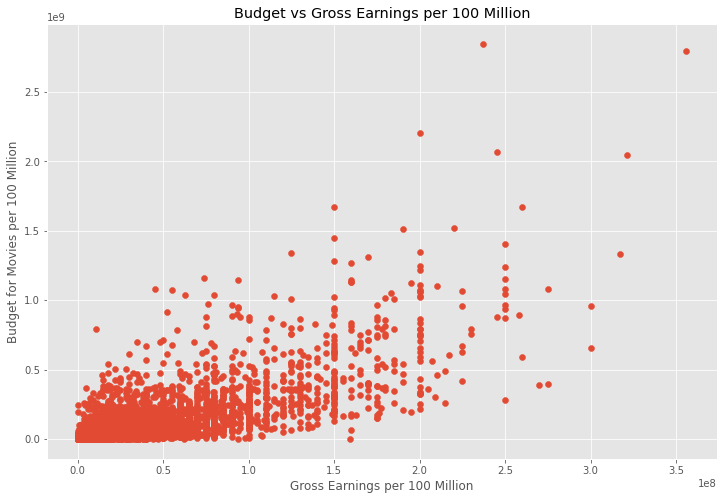

In [97]:
# Scatter plot budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings per 100 Million')

plt.xlabel('Gross Earnings per 100 Million')

plt.ylabel('Budget for Movies per 100 Million')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

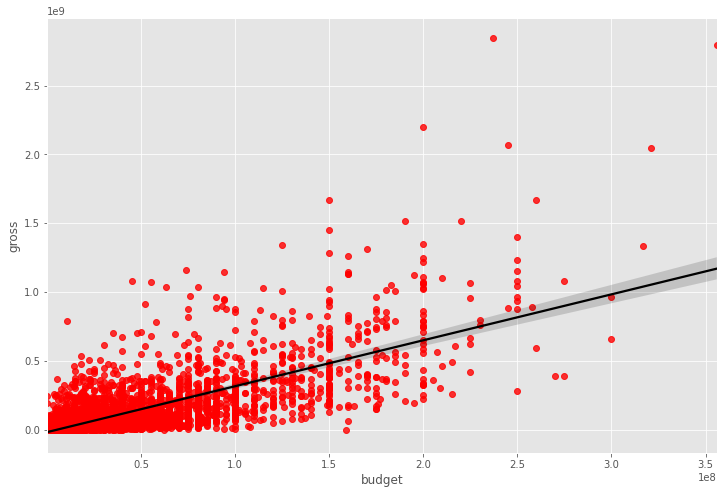

In [105]:
# Plot budget vs gross using seaborn (reg plot or russian plot)

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"black"})



In [ ]:
# Finding the exact correlation -- methods: pearson, kendall, spearman

In [110]:
df.corr(method='pearson')

# High correlation between budget and gross is a 0.74 according to our table here

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


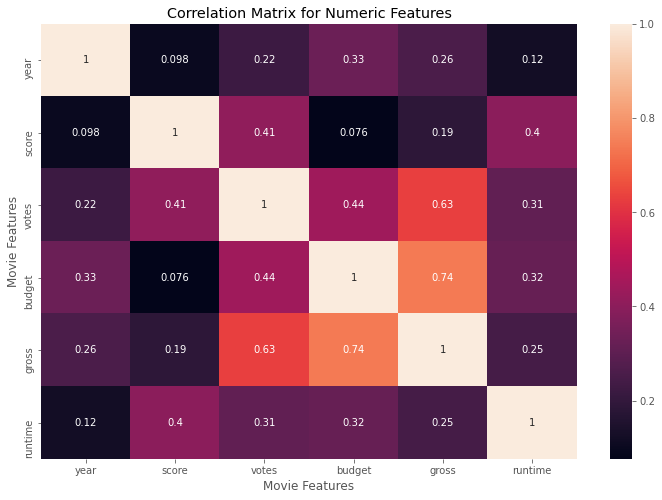

In [113]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

# The dark parts here show low correlation and the light shows high correlation

In [133]:
# Looking at company data and giving it a rank based off its performance to add to our Matrix

df_ranks = df

for col_name in df_ranks.columns:
    if(df_ranks[col_name].dtype == 'object'):
        df_ranks[col_name] = df_ranks[col_name].astype('category')
        df_ranks[col_name] = df_ranks[col_name].cat.codes
        
df_ranks.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,21
7445,Avengers: Endgame,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,143
3045,Titanic,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,22
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,21
7244,Avengers: Infinity War,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,142


In [132]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,21
7445,Avengers: Endgame,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,143
3045,Titanic,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,22
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,21
7244,Avengers: Infinity War,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,142


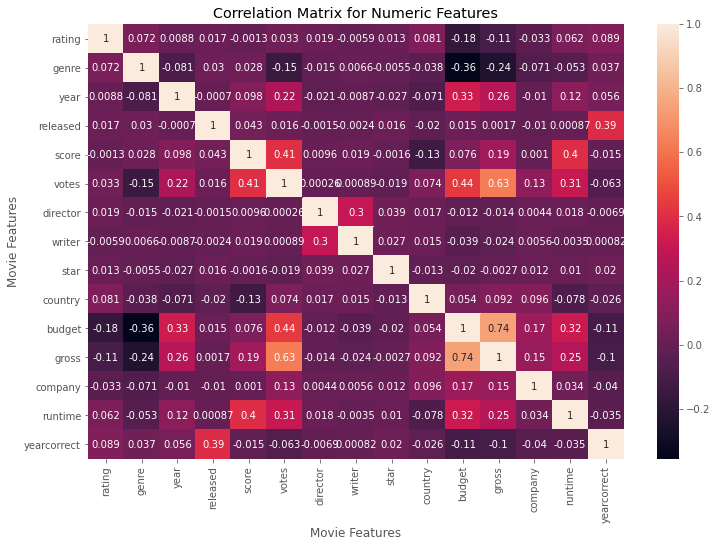

In [126]:
correlation_matrix = df_ranks.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [127]:
df_ranks.corr()

# Again, in this heatmap here we see the budget has a really big impact on correlation
# Now what I want to do here is find the items with high correlation quickly

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
rating,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.089480
genre,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,0.037442
year,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,0.055599
released,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,0.394412
score,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,-0.015107
votes,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,-0.063213
director,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.006934
writer,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,0.000817
star,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,0.019993
country,0.081244,-0.037615,-0.070938,-0.020427,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.054063,0.092129,0.095548,-0.078412,-0.025795


In [135]:
# Unstacking

correlation_mat = df_ranks.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

rating  rating      1.000000
        genre       0.072423
        year        0.008779
        released    0.016613
        score      -0.001314
dtype: float64

In [134]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

genre   budget   -0.356564
budget  genre    -0.356564
gross   genre    -0.235650
genre   gross    -0.235650
budget  rating   -0.176002
dtype: float64

In [131]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]

high_corr

votes        gross          0.630757
gross        votes          0.630757
             budget         0.740395
budget       gross          0.740395
rating       rating         1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have really high correlation (Note: I didn't expect votes to play such a major factor in correlation)
# Company has no major impact on correlation and my assumption was wrong.